In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
def desenhar_grafo(G, cobertura, titulo, pos=None):
    plt.figure(figsize=(6, 4))
    
    # Define vermelho e azul claro (Vermelho para oque ele cobre nessa bomba)
    cores = ['red' if node in cobertura else 'lightblue' for node in G.nodes()]

    if pos is None:
        pos = nx.spring_layout(G, seed=42) 
    
    nx.draw(G, pos, with_labels=True, node_color=cores, node_size=800, font_weight='bold', edge_color='gray',width=2)
      
    plt.title(f"{titulo}\nCobertura: {cobertura}")
    plt.show()

# Grafo 1: Caminho Simples com 4 Vértices

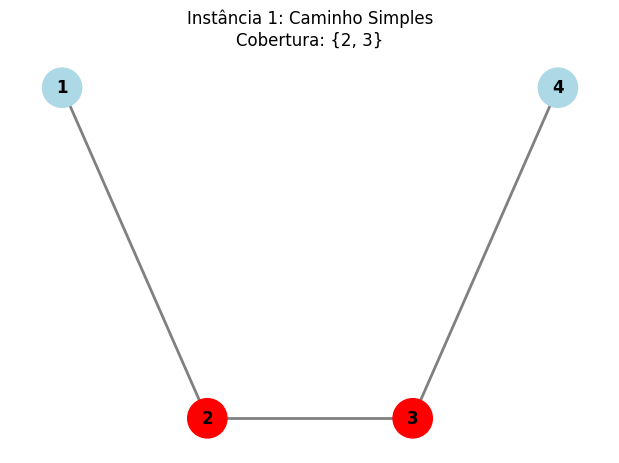

In [3]:
# --- Instância 1: Caminho Simples ---
G1 = nx.Graph()
# Adicionando arestas (os vértices são criados automaticamente)
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])
cobertura_1 = {2, 3}

# Layout espectral costuma deixar caminhos bem alinhados
pos_1 = nx.spectral_layout(G1) 
desenhar_grafo(G1, cobertura_1, "Instância 1: Caminho Simples", pos_1)

Vértices: [1, 2, 3, 4]
Arestas: [(1, 2), (2, 3), (3, 4)]


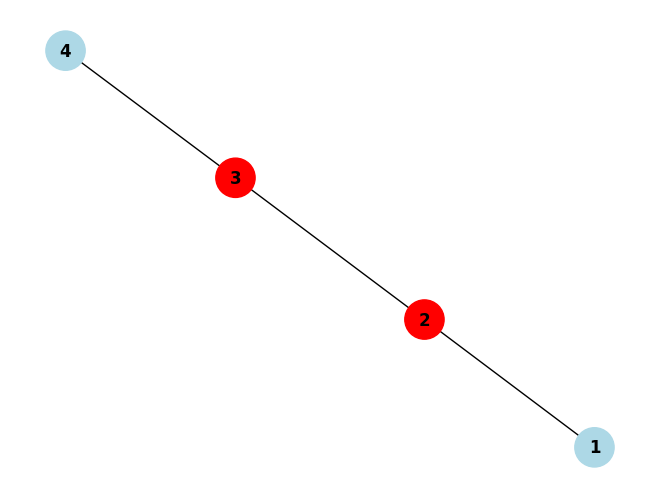

In [4]:
# Grafo simples sem função e customização
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])
cobertura_1 = {2, 3}

print(f"Vértices: {G1.nodes()}")
print(f"Arestas: {G1.edges()}")

cores = ['red' if node in cobertura_1 else 'lightblue' for node in G1.nodes()]

# Desenhar
nx.draw(G1, with_labels=True, node_color=cores, node_size=800, font_weight='bold')
plt.show()

# Grafo 2: Quadrado com Diagonal

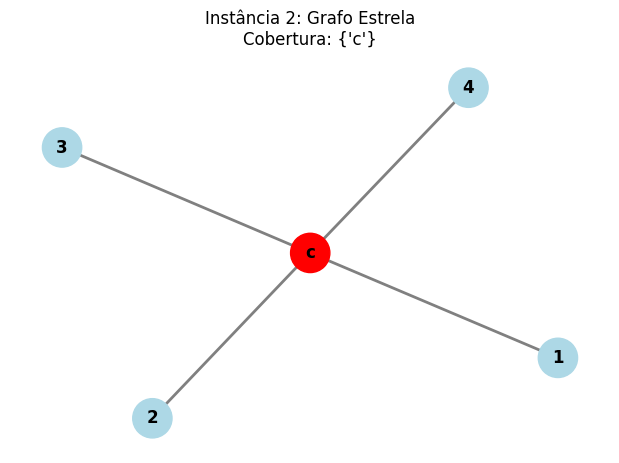

In [5]:
# --- Instância 2: Grafo Estrela ---
G2 = nx.Graph()
# 'c' é o centro, 1-4 são as pontas
arestas_estrela = [('c', 1), ('c', 2), ('c', 3), ('c', 4)]
G2.add_edges_from(arestas_estrela)
cobertura_2 = {'c'}

# Layout spring funciona muito bem para estrelas
desenhar_grafo(G2, cobertura_2, "Instância 2: Grafo Estrela")

Vértices: ['c', 1, 2, 3, 4]
Arestas: [('c', 1), ('c', 2), ('c', 3), ('c', 4)]


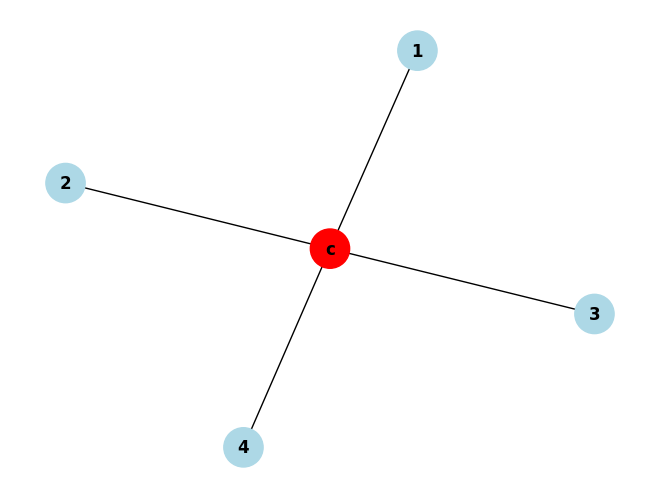

In [6]:
# --- Definição do Grafo ---
G2 = nx.Graph()
# 'c' é o centro
G2.add_edges_from([('c', 1), ('c', 2), ('c', 3), ('c', 4)])
cobertura_2 = {'c'}

# --- Visualização Rápida ---
print(f"Vértices: {G2.nodes()}")
print(f"Arestas: {G2.edges()}")

cores = ['red' if node in cobertura_2 else 'lightblue' for node in G2.nodes()]

nx.draw(G2, with_labels=True, node_color=cores, node_size=800, font_weight='bold')
plt.show()

# Grafo 3: Quadrado com Diagonal

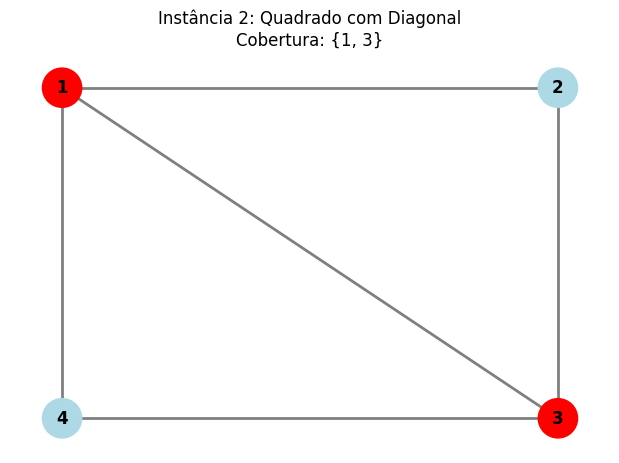

In [7]:
# --- Instância 3: Quadrado com Diagonal ---
G3 = nx.Graph()
arestas_quadrado = [(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)]
G3.add_edges_from(arestas_quadrado)
cobertura_3 = {1, 3}

# Definindo posições manuais para parecer um quadrado perfeito
pos_3 = {
    1: (0, 1),  # Superior Esquerdo
    2: (1, 1),  # Superior Direito
    3: (1, 0),  # Inferior Direito
    4: (0, 0)   # Inferior Esquerdo
}
desenhar_grafo(G3, cobertura_3, "Instância 2: Quadrado com Diagonal", pos_3)

Vértices: [1, 2, 3, 4]
Arestas: [(1, 2), (1, 4), (1, 3), (2, 3), (3, 4)]


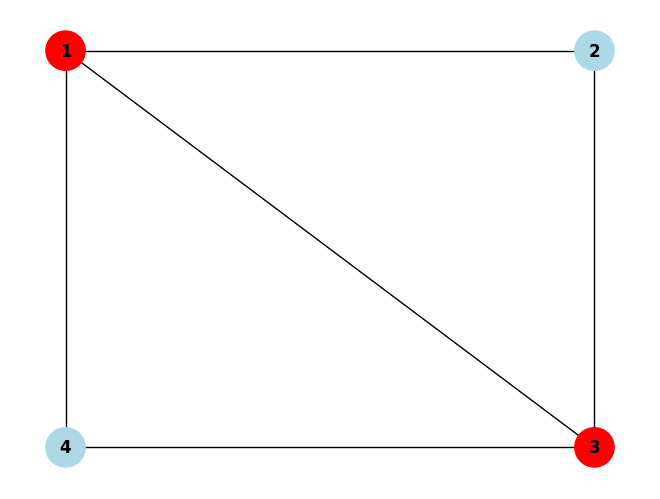

In [8]:
# --- Definição do Grafo ---
G3 = nx.Graph()
G3.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])
cobertura_3 = {1, 3}

# --- Visualização Rápida ---
print(f"Vértices: {G3.nodes()}")
print(f"Arestas: {G3.edges()}")

cores = ['red' if node in cobertura_3 else 'lightblue' for node in G3.nodes()]

# Dicionário de posições manuais para ficar visualmente igual a um quadrado
pos_quadrado = {
    1: (0, 1), 2: (1, 1),
    4: (0, 0), 3: (1, 0)
}

nx.draw(G3, pos=pos_quadrado, with_labels=True, node_color=cores, node_size=800, font_weight='bold')
plt.show()

# Grafo 4: Quadrado com Diagonal

A cobertura {'v12', 'v22', 'v32'} cobre TODAS as arestas? False
Arestas que ficaram de fora: [('v11', 'v21'), ('v13', 'v23'), ('v21', 'v31'), ('v23', 'v33')]


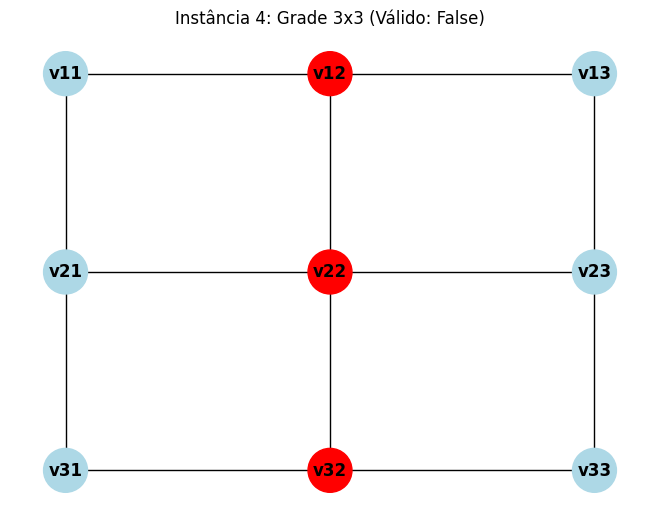

In [9]:
## PEDI PRO GEPETAS ESSE AQUI, ELE FEZ O PRIMEIRO ERRADO E O SEGUNDO CERTO

# --- Função Auxiliar de Verificação ---
def verificar_cobertura(G, cobertura_set):
    arestas_descobertas = []
    for u, v in G.edges():
        # Para ser cobertura, u OU v deve estar no conjunto
        if u not in cobertura_set and v not in cobertura_set:
            arestas_descobertas.append((u, v))
            
    eh_valido = len(arestas_descobertas) == 0
    return eh_valido, arestas_descobertas

# --- Definição do Grafo (Instância 4: Grade 3x3) ---
G4 = nx.Graph()
nodes = [
    'v11', 'v12', 'v13',
    'v21', 'v22', 'v23',
    'v31', 'v32', 'v33'
]
G4.add_nodes_from(nodes)

# Arestas Horizontais
h_edges = [
    ('v11', 'v12'), ('v12', 'v13'),
    ('v21', 'v22'), ('v22', 'v23'),
    ('v31', 'v32'), ('v32', 'v33')
]
# Arestas Verticais
v_edges = [
    ('v11', 'v21'), ('v21', 'v31'),
    ('v12', 'v22'), ('v22', 'v32'),
    ('v13', 'v23'), ('v23', 'v33')
]
G4.add_edges_from(h_edges + v_edges)

# --- Teste da Cobertura ---
# Sua sugestão: Coluna do meio
cobertura_4 = {'v12', 'v22', 'v32'}

eh_valido, arestas_faltantes = verificar_cobertura(G4, cobertura_4)

print(f"A cobertura {cobertura_4} cobre TODAS as arestas? {eh_valido}")

if not eh_valido:
    print(f"Arestas que ficaram de fora: {arestas_faltantes}")

# --- Visualização ---
pos_grid = {
    'v11': (0, 2), 'v12': (1, 2), 'v13': (2, 2),
    'v21': (0, 1), 'v22': (1, 1), 'v23': (2, 1),
    'v31': (0, 0), 'v32': (1, 0), 'v33': (2, 0)
}

cores = ['red' if node in cobertura_4 else 'lightblue' for node in G4.nodes()]

# Desenha o grafo
nx.draw(G4, pos=pos_grid, with_labels=True, node_color=cores, node_size=1000, font_weight='bold')
plt.title(f"Instância 4: Grade 3x3 (Válido: {eh_valido})")
plt.show()

A cobertura {'v21', 'v12', 'v23', 'v32'} é válida? True


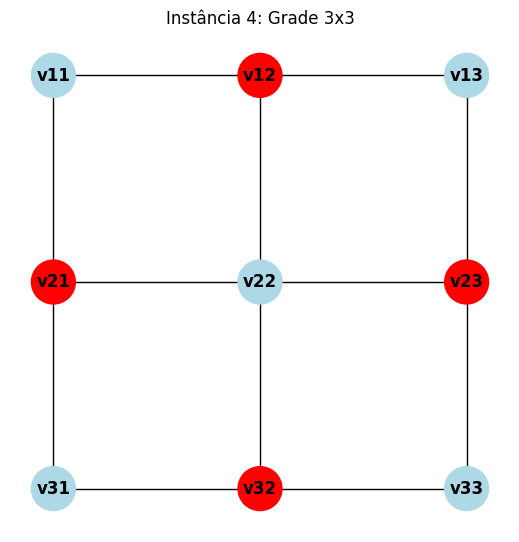

In [10]:
# Cobertura valida

# Vamos tentar o padrão 'X' (os cantos e o centro) isso cobre todas as arestas incidentes nesses vértices
cobertura_valida = {'v11', 'v13', 'v22', 'v31', 'v33'} 

# Vamos testar a inversa que é menor (tamanho 4):
cobertura_otima = {'v12', 'v21', 'v23', 'v32'}

# Vamos usar a função de verificação manual da célula anterior
eh_valido, faltantes = verificar_cobertura(G4, cobertura_otima)

print(f"A cobertura {cobertura_otima} é válida? {eh_valido}")

if not eh_valido:
    print(f"Faltaram: {faltantes}")

# Visu
cores = ['red' if node in cobertura_otima else 'lightblue' for node in G4.nodes()]

plt.figure(figsize=(5, 5))
nx.draw(G4, pos=pos_grid, with_labels=True, node_color=cores, node_size=1000, font_weight='bold')
plt.title(f"Instância 4: Grade 3x3")
plt.show()